In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading Dataset

In [2]:
## Import Dataset
#df_mean = pd.DataFrame()
#
#for doc in os.listdir("data//"):
#    file = "data/"+doc
#    name = doc.replace(".txt","").lower()
#    data = pd.read_csv(file, sep="\t", header=None, engine="python")
#    data = data.copy().T.mean()
#    data = data.drop(columns="profile")
#    df_mean[name] = data
#    
#df_mean = df_mean.drop(columns="profile")
#
## Target Cols
#target_col = ["profile_mean"]
#headers = ["cooler_condition", "valve_condition", "pump_leakage", "hydraulic_accumulator", "stable_flag"]
#target_df = pd.read_csv("data/profile.txt", sep="\t", header=None, names=headers)
#
## Attributes
#attributes_col = [col for col in df_mean if col not in target_df.columns]
#feature_df = df_mean[attributes_col]
#
## Merge dataframes
#merged_df = pd.merge(feature_df, target_df, left_index=True, right_index=True)
#merged_df.to_pickle("merged_df.pkl")

In [3]:
mean_df = pd.read_pickle("merged_df.pkl")

target_cols = ['cooler_condition', 'valve_condition', 'pump_leakage', 
               'hydraulic_accumulator', 'stable_flag']

feature_df = mean_df[[col for col in mean_df.columns if col not in target_cols]]
target_df = mean_df[target_cols]

# Features Data - examing and plotting

## Pressure

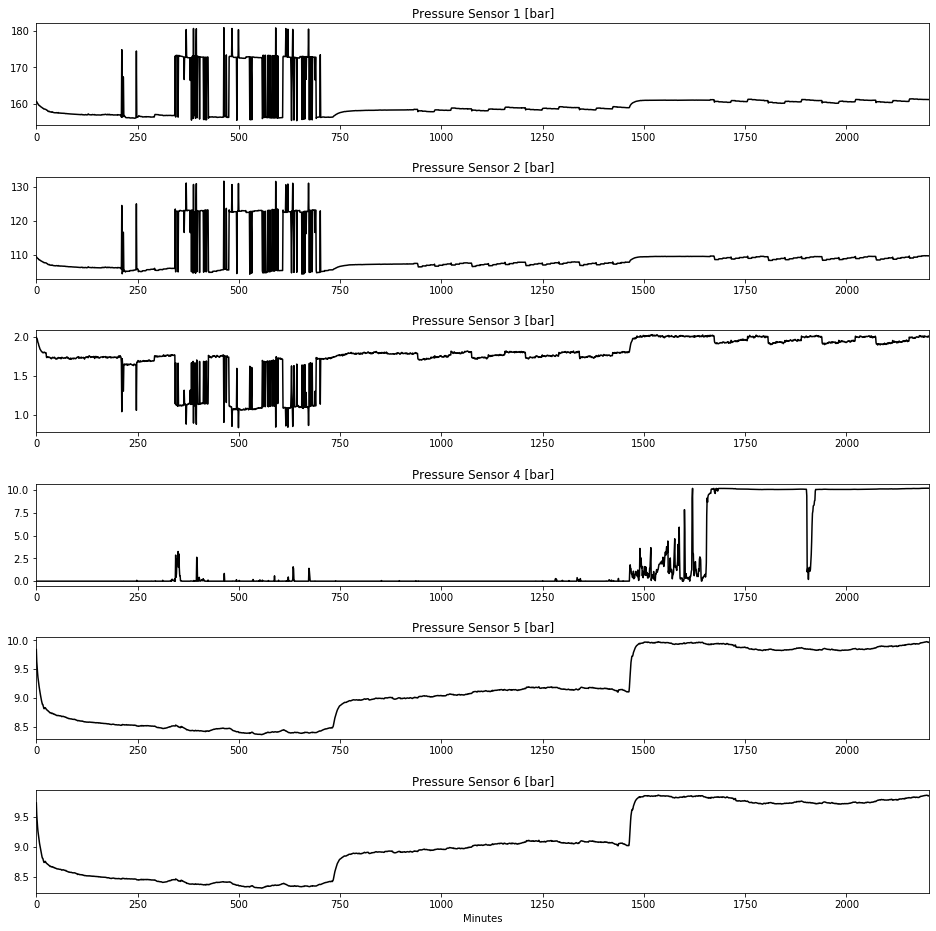

In [5]:
fig, ax = plt.subplots(nrows=6, figsize=(16,16))

feature_df.ps1.plot(ax=ax[0], title="Pressure Sensor 1 [bar]", color="black")
feature_df.ps2.plot(ax=ax[1], title="Pressure Sensor 2 [bar]", color="black")
feature_df.ps3.plot(ax=ax[2], title="Pressure Sensor 3 [bar]", color="black")
feature_df.ps4.plot(ax=ax[3], title="Pressure Sensor 4 [bar]", color="black")
feature_df.ps5.plot(ax=ax[4], title="Pressure Sensor 5 [bar]", color="black")
feature_df.ps6.plot(ax=ax[5], title="Pressure Sensor 6 [bar]", color="black")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

plt.xlabel("Minutes");

## Temperature

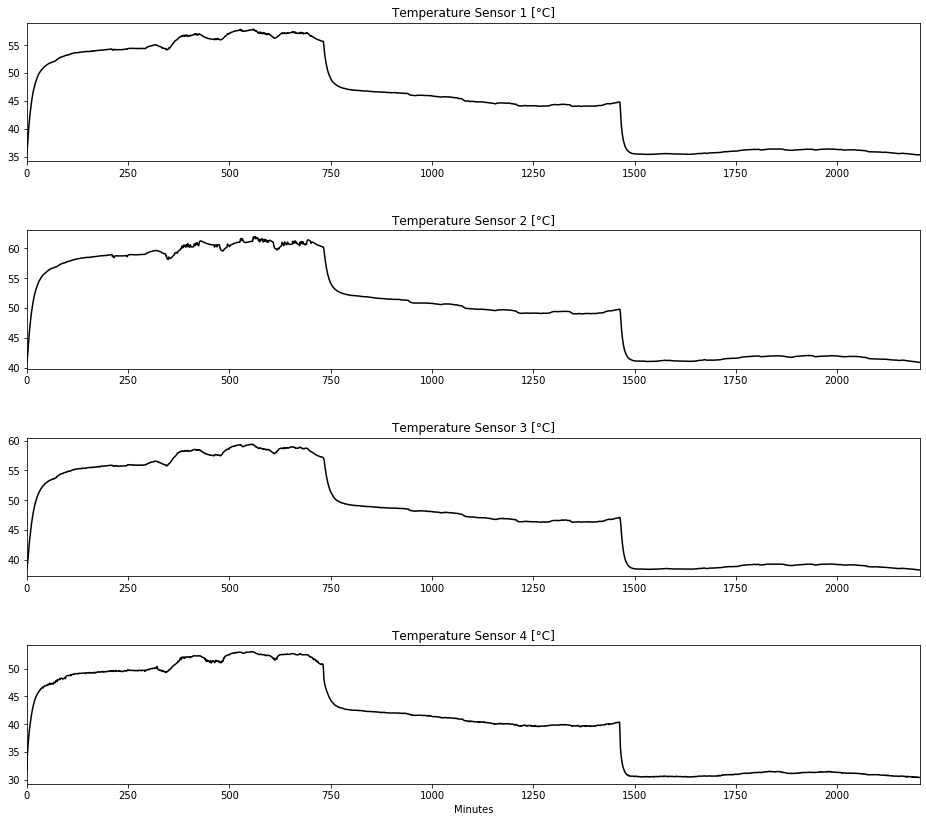

In [6]:
fig, ax = plt.subplots(nrows=4, figsize=(16,14))

feature_df.ts1.plot(ax=ax[0], title="Temperature Sensor 1 [°C]", color="black")
feature_df.ts2.plot(ax=ax[1],title="Temperature Sensor 2 [°C]", color="black")
feature_df.ts3.plot(ax=ax[2], title="Temperature Sensor 3 [°C]", color="black")
feature_df.ts4.plot(ax=ax[3], title="Temperature Sensor 4 [°C]", color="black")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

plt.xlabel("Minutes");

## Volume Flow

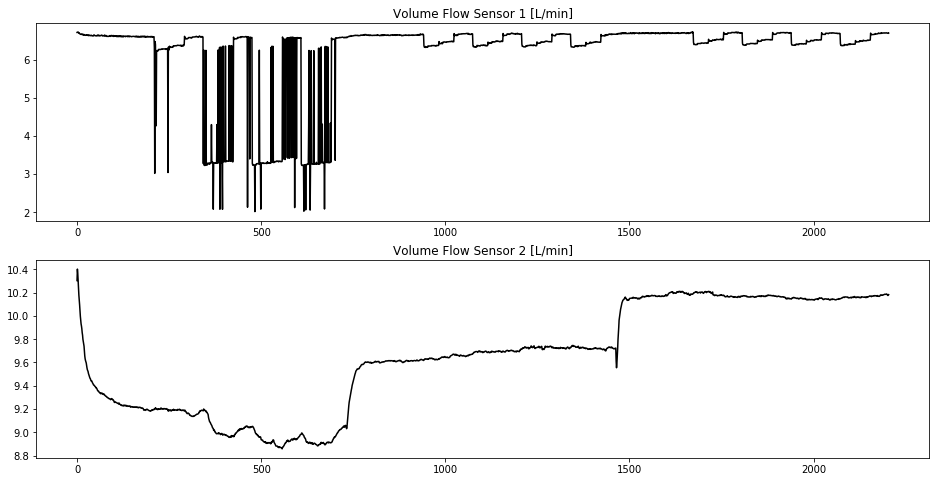

In [7]:
vol_flow = ['fs1', 'fs2']
data_plot = feature_df.loc[:, feature_df.columns.isin(vol_flow)]

fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.lineplot(data=data_plot.fs1, ax=ax[0], color="black")
sns.lineplot(data=data_plot.fs2, ax=ax[1], color="black")
ax[0].set_title("Volume Flow Sensor 1 [L/min]")
ax[1].set_title("Volume Flow Sensor 2 [L/min]");

## Cooling efficiency and Power

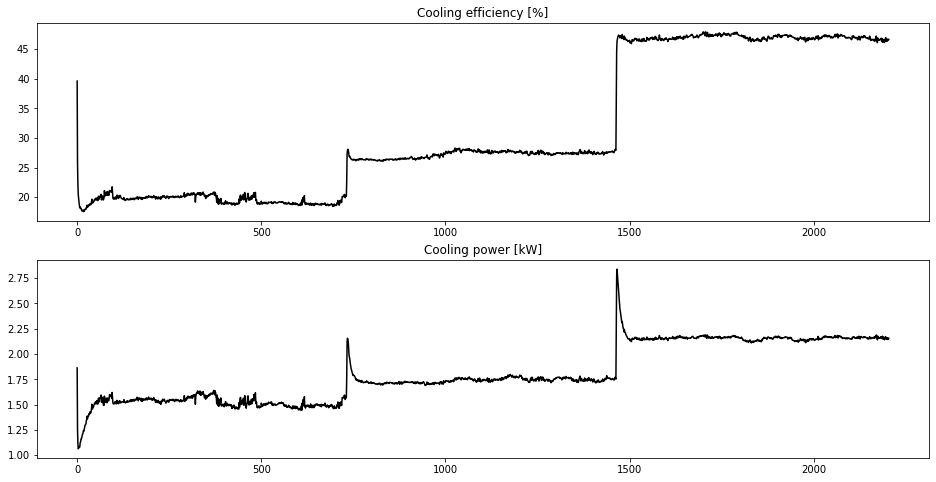

In [8]:
cooling_system = ['ce', 'cp']
data_plot = feature_df.loc[:, feature_df.columns.isin(cooling_system)]

fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.lineplot(data=data_plot.ce, ax=ax[0], color="black")
sns.lineplot(data=data_plot.cp, ax=ax[1], color="black")
ax[0].set_title("Cooling efficiency [%]")
ax[1].set_title("Cooling power [kW]");

## Motor Power

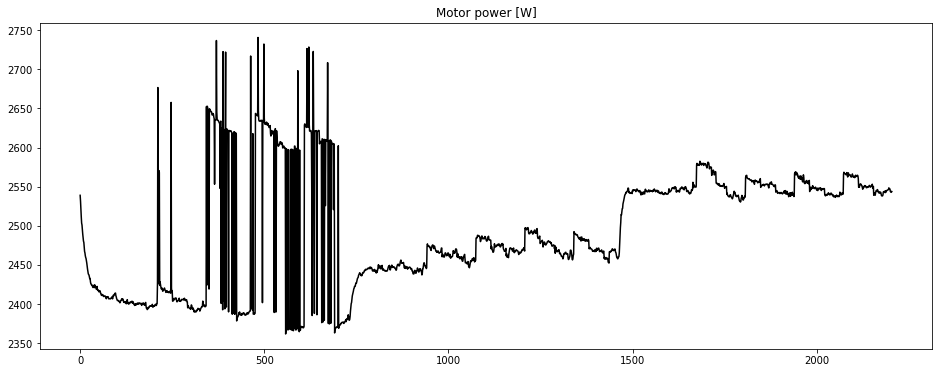

In [9]:
#data_plot = feature_df.loc[:, feature_df.columns.isin(cooling_system)]

fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=merged_df.eps1, color="black")
ax.set_title("Motor power [W]");

# Targets Data - examing and plotting

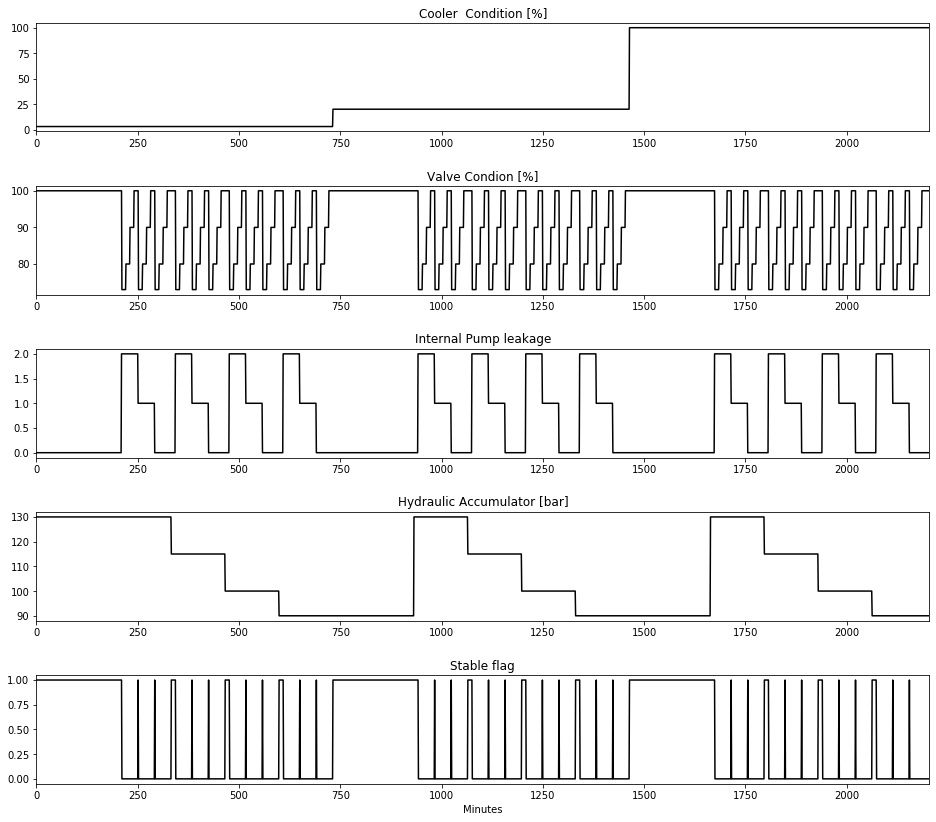

In [10]:
fig, ax = plt.subplots(nrows=5, figsize=(16,14))

target_df.cooler_condition.plot(ax=ax[0], title="Cooler  Condition [%]", color="black")
target_df.valve_condition.plot(ax=ax[1],title="Valve Condion [%]", color="black")
target_df.pump_leakage.plot(ax=ax[2], title="Internal Pump leakage", color="black")
target_df.hydraulic_accumulator.plot(ax=ax[3], title="Hydraulic Accumulator [bar]", color="black")
target_df.stable_flag.plot(ax=ax[4], title="Stable flag", color="black")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

plt.xlabel("Minutes");